# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

In [9]:
#Here I have used randomhorizontal flip, random padding and brightness adjustment as techniques. 
#Since objects in most images lie at the center or exterme perphery of the image, 
#it makes sense to use random horizontal flip.
#Brightness adjustment could be useful as some images are taken at night with very low lighting.


### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import tensorflow as tf

In [66]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    #f, ax = plt.subplots(1, figsize=(10, 10))
    #ax.imshow(image.astype(np.uint8))
    flipped = tf.image.flip_left_right(image)
    random_brightness = tf.image.random_brightness(
      image, max_delta=0.4)
    random_contrast = tf.image.random_contrast(image, 0.2, 0.5)

    f, ax = plt.subplots(2,2, figsize=(12, 12))
    #f.subplots_adjust(hspace=0.5, wspace=0.5)

    ax[0,0].imshow(image.astype(np.uint8))
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(flipped.numpy().astype(np.uint8))
    ax[0,1].set_title('random_horizontal_flip')
    ax[1,0].imshow(random_brightness.numpy().astype(np.uint8))
    ax[1,0].set_title('random_adjust_brightness')
    ax[1,1].imshow(random_contrast.numpy().astype(np.uint8))
    ax[1,1].set_title('random_adjust_contrast')
    
#     for bb, cl in zip(bboxes, classes):
#         y1, x1, y2, x2 = bb
#         rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
#         ax[0].add_patch(rec)
        
    
        #ax[1].add_patch(rec)
#         ax[1,0].add_patch(rec)
#         ax[1,1].add_patch(rec)

    
#     for bb, cl in zip(bboxes, classes):
#         y1, x1, y2, x2 = bb
#         rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
#         ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [67]:
from utils import get_train_input

In [68]:
train_dataset = get_train_input("pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/home/works

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Number of filenames to read: 86


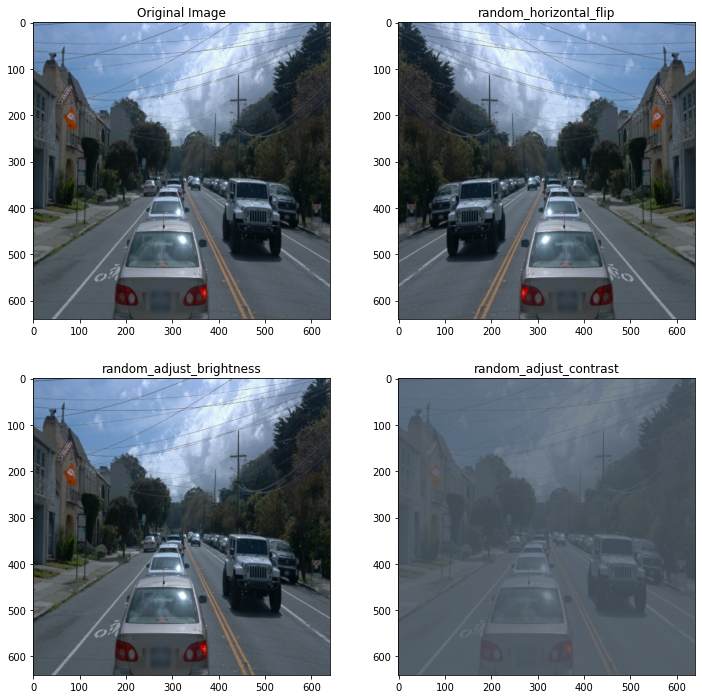

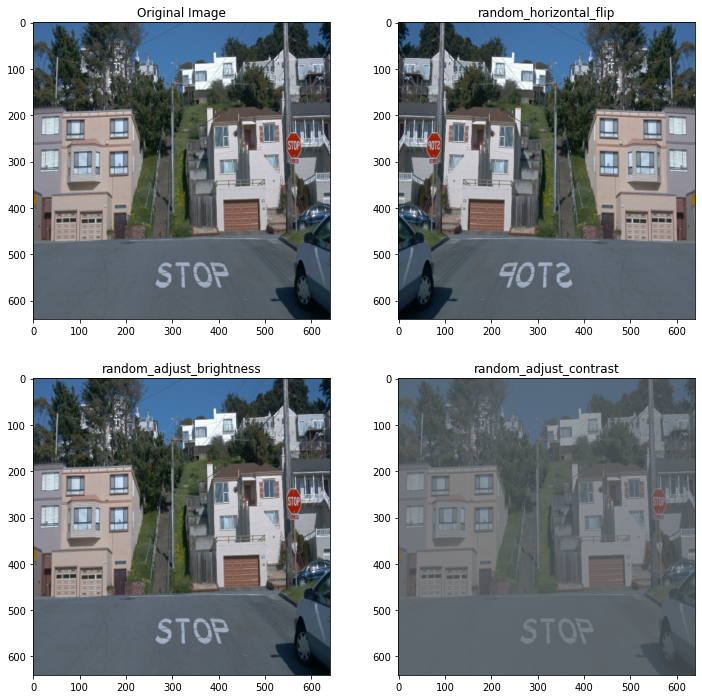

In [69]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)